# COIN GAME 1

### How do 1000 plays of the biased coin play out?

We have an average growth rate:  0.06019277493094745


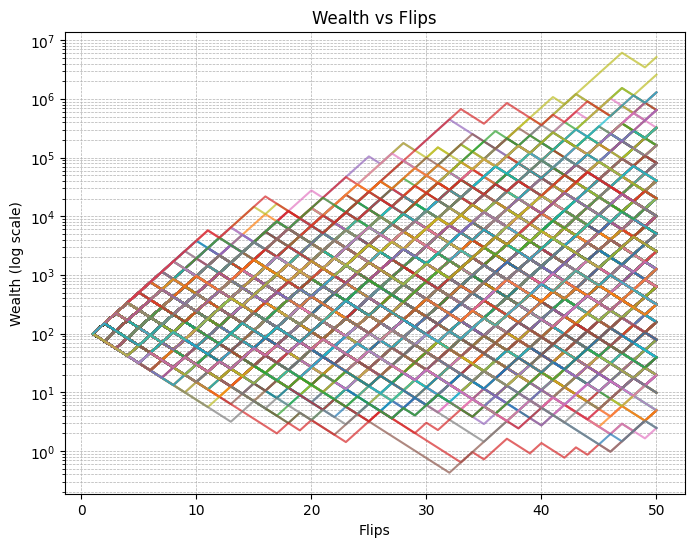

In [116]:
import random
import matplotlib.pyplot as plt
import numpy as np

def coinFlip() -> int:
    return random.randint(1, 100)

def newW(f, w) -> int:
    wager = w * f
    if coinFlip() > 50:
        return w + 2 * wager
    else:
        return w - wager
        
# f* = p - q/b
kelly_fraction = 0.5 - 0.5/2


fraction = kelly_fraction

initial_wealth = 100
flips = 50
num_runs = 1000
# we will adjust to find average g at the end
growth_rate_total = 0


plt.figure(figsize=(8, 6))

for run in range(num_runs):
    wealth = [initial_wealth]
    for i in range(1, flips):
        wealth.append(newW(fraction, wealth[i-1]))
    growth_rate_total += ( pow( (wealth[-1]/wealth[0]), (1/flips)) - 1 ) 
    n = np.arange(1, len(wealth) + 1) 
    plt.plot(n, wealth, linestyle="-", alpha=0.7, label=f"Run {run+1}") 
    
print("We have an average growth rate:  " + str(growth_rate_total/ num_runs))

plt.yscale("log")
plt.xlabel("Flips")
plt.ylabel("Wealth (log scale)")
plt.title("Wealth vs Flips")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


### Lets plot now the fractions vs their avg growth rate

The fraction which gives highest growth is: 0.2


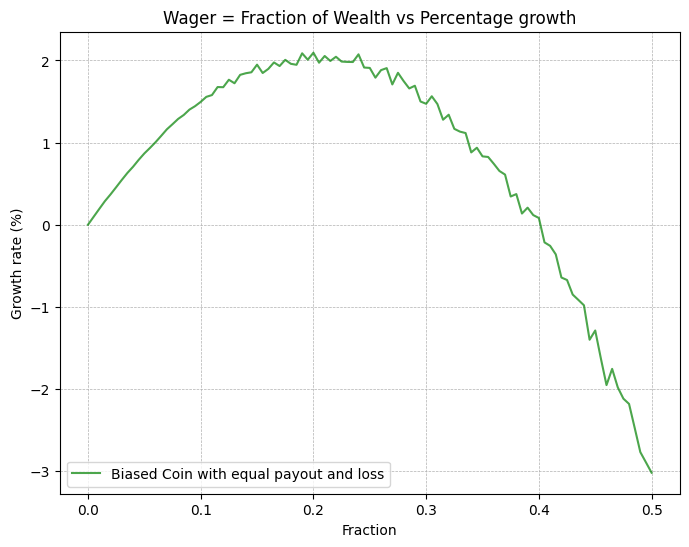

In [152]:
import random
import matplotlib.pyplot as plt
import numpy as np

def coinFlip() -> int:
    return random.randint(1, 100)


####
#We can tweak this function to change the game, odds and ROI

def newW(f, w , p , a , b) -> int:
    wager = w * f
    if coinFlip() > (1-p)*100: # 
        return w + a * wager
    else:
        return w - b * wager


####
# f* = p - q/b
kelly_fraction = 0.5 - 0.5/2

fractions = np.linspace(0,0.5,101)

initial_wealth = 100
flips = 50
num_runs = 5000
# we will adjust to find average g at the end
growth_rate_total = 0


plt.figure(figsize=(8, 6))


#### Game set up 
P = 0.6   # meaning Q = 1 - P
A = 1     # 1:1 odds on a win
B = 1     # Lose wager on a loss. 

def findGrowth(fraction, P) -> float:
    
    growth_rate_total =0
    for run in range(num_runs):
        wealth = [initial_wealth]
        for i in range(1, flips):
            wealth.append(newW(fraction, wealth[i-1] , P, A, B ))
        growth_rate_total += ( pow( (wealth[-1]/wealth[0]), (1/flips)) - 1 ) 
        n = np.arange(1, len(wealth) + 1) 
        
    return growth_rate_total/ num_runs * 100 # so that it is a percentage growth or loss

growths = []

for f in fractions:
    growths.append(findGrowth(f, P))

### FIND MAXIMA
maxFracIndex = growths.index(max(growths))
print("The fraction which gives highest growth is: " + str(fractions[maxFracIndex]))




plt.plot(fractions, growths, linestyle="-", alpha=0.7, color = 'green', label='Biased Coin with equal payout and loss') 

#plt.yscale("log")
plt.xlabel("Fraction")
plt.ylabel("Growth rate (%)")
plt.title("Wager = Fraction of Wealth vs Percentage growth")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()





### Given the same payout odds, 1:1 for a win and lose the wager, how does f* change for p in [0.5, 0.9]? 




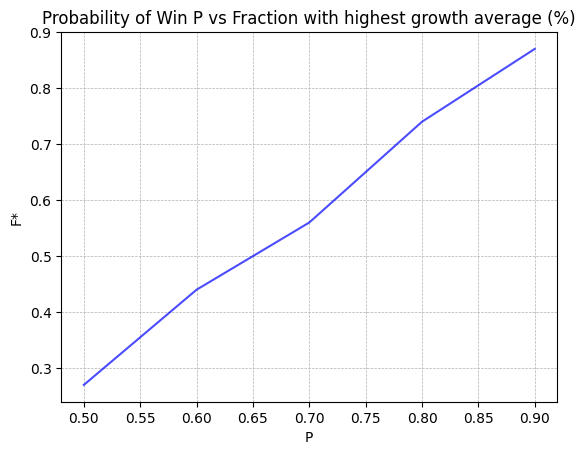

In [149]:

#fractions = np.linspace(0,0.5,101)
Ps = np.linspace(0.5,0.9,5)


def findMaxFrac(P) -> float:
    growths =[]
    for f in fractions:
        growths.append(findGrowth(f, P))

    ### FIND MAXIMA
    maxFracIndex = growths.index(max(growths))
    return fractions[maxFracIndex]

maxFrac = []
for p in Ps:
    maxFrac.append(findMaxFrac(p))

plt.plot(Ps, maxFrac, linestyle="-", alpha=0.7, color = 'blue') 

#plt.yscale("log")
plt.xlabel("P")
plt.ylabel("F*")
plt.title("Probability of Win P vs Fraction with highest growth average (%)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### Maximizing function for f*

In [ ]:
 # f(x):=p*log(1+bx−x)+(1−p)*log(1−x)
 # now let's find x for f'(x):=0
def f_prime(x , p , )

